In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from functools import reduce

In [4]:
df = pd.read_csv('dataset.csv', encoding = 'unicode_escape')

In [5]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [6]:
df.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

# Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
Customer: This feature represents the customer id
zipCodeOrigin: The zip code of origin/source.
Merchant: The merchant's id
zipMerchant: The merchant's zip code
Age: Categorized age
0: <= 18,
1: 19-25,
2: 26-35,
3: 36-45,
4: 46:55,
5: 56:65,
6: > 65
U: Unknown
Gender: Gender for customer
E : Enterprise,
F: Female,
M: Male,
U: Unknown
Category: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
Amount: Amount of the purchase
Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)

In [7]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [9]:
df['fraud'].unique()

array([0, 1], dtype=int64)

In [10]:
#pip install missingno

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='fraud', ylabel='count'>

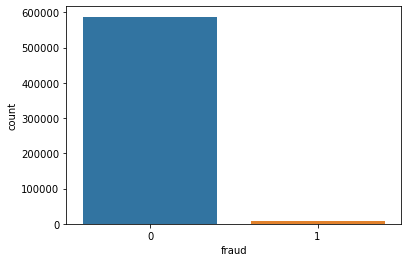

In [13]:
sns.countplot(x=df['fraud'], data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


32.36583815088305

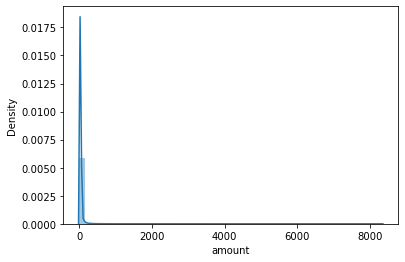

In [14]:
sns.distplot(df['amount'])
df['amount'].skew()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [16]:
df['customer'].unique()

array(["'C1093826151'", "'C352968107'", "'C2054744914'", ...,
       "'C1014783484'", "'C849065220'", "'C1809646275'"], dtype=object)

In [17]:
df['age'].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

In [18]:
df.loc[df['age']=="'0'", 'age'] = 0
df.loc[df['age']=="'1'", 'age'] = 1
df.loc[df['age']=="'2'", 'age'] = 2
df.loc[df['age']=="'3'", 'age'] = 3
df.loc[df['age']=="'4'", 'age'] = 4
df.loc[df['age']=="'5'", 'age'] = 5
df.loc[df['age']=="'6'", 'age'] = 6
df.loc[df['age']=="'U'", 'age'] = 7


In [19]:
df['age'].unique()

array([4, 2, 3, 5, 1, 6, 7, 0], dtype=object)

In [20]:
df['gender'].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

In [21]:
df.loc[df['gender']=="'E'", 'gender'] = 0
df.loc[df['gender']=="'F'", 'gender'] = 1
df.loc[df['gender']=="'M'", 'gender'] = 2
df.loc[df['gender']=="'U'", 'gender'] = 3

In [22]:
df['gender'].unique()

array([2, 1, 0, 3], dtype=object)

In [23]:
df['step'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], d

In [24]:
df['zipcodeOri'].unique()

array(["'28007'"], dtype=object)

28007 zipcode - Ansonville, North Carolina, United States

In [25]:
df.loc[df['zipcodeOri']=="'28007'", 'zipcodeOri'] = 0


In [26]:
df['merchant'].unique()

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

In [27]:
df.loc[df['merchant']=="'M348934600'", 'merchant'] = 0
df.loc[df['merchant']=="'M1823072687'", 'merchant'] = 1
df.loc[df['merchant']=="'M50039827'", 'merchant'] = 2
df.loc[df['merchant']=="'M1888755466'", 'merchant'] = 3
df.loc[df['merchant']=="'M1053599405'", 'merchant'] = 4
df.loc[df['merchant']=="'M85975013'", 'merchant'] = 5
df.loc[df['merchant']=="'M480139044'", 'merchant'] = 6
df.loc[df['merchant']=="'M692898500'", 'merchant'] = 7
df.loc[df['merchant']=="'M348875670'", 'merchant'] = 8
df.loc[df['merchant']== "'M151143676'", 'merchant'] = 9
df.loc[df['merchant']=="'M840466850'", 'merchant'] = 10
df.loc[df['merchant']=="'M1741626453'", 'merchant'] = 11
df.loc[df['merchant']=="'M1053599405'", 'merchant'] = 12
df.loc[df['merchant']=="'M1535107174'", 'merchant'] = 13
df.loc[df['merchant']=="'M855959430'",  'merchant'] = 14
df.loc[df['merchant']=="'M349281107'",  'merchant'] = 15

In [28]:
df.loc[df['merchant']== "'M209847108'",'merchant'] = 16
df.loc[df['merchant']=="'M2122776122'",  'merchant'] = 17
df.loc[df['merchant']=="'M1873032707'",  'merchant'] = 18
df.loc[df['merchant']=="'M2011752106'",  'merchant'] = 19
df.loc[df['merchant']=="'M857378720'", 'merchant'] = 20
df.loc[df['merchant']=="'M1198415165'",  'merchant'] = 21
df.loc[df['merchant']=="'M1748431652'",  'merchant'] = 22
df.loc[df['merchant']=="'M980657600'",  'merchant'] = 23
df.loc[df['merchant']=="'M1352454843'", 'merchant'] = 24
df.loc[df['merchant']== "'M117188757'",  'merchant'] = 25
df.loc[df['merchant']=="'M547558035'",  'merchant'] = 26
df.loc[df['merchant']=="'M17379832'",  'merchant'] = 27
df.loc[df['merchant']=="'M1649169323'", 'merchant'] = 28
df.loc[df['merchant']=="'M1946091778'",  'merchant'] = 29
df.loc[df['merchant']=="'M97925176'",   'merchant'] = 30
df.loc[df['merchant']=="'M923029380'",   'merchant'] = 31

In [29]:
df.loc[df['merchant']== "'M1353266412'", 'merchant'] = 32
df.loc[df['merchant']=="'M1842530320'",   'merchant'] = 33
df.loc[df['merchant']=="'M677738360'",   'merchant'] = 34
df.loc[df['merchant']=="'M1313686961'",   'merchant'] = 35
df.loc[df['merchant']=="'M732195782'", 'merchant'] = 36
df.loc[df['merchant']=="'M1600850729'",   'merchant'] = 37
df.loc[df['merchant']=="'M1872033263'",   'merchant'] = 38
df.loc[df['merchant']=="'M3697346'",   'merchant'] = 39
df.loc[df['merchant']=="'M495352832'", 'merchant'] = 40
df.loc[df['merchant']== "'M1400236507'",   'merchant'] = 41
df.loc[df['merchant']=="'M1294758098'",   'merchant'] = 42
df.loc[df['merchant']=="'M1913465890'",   'merchant'] =43 
df.loc[df['merchant']=="'M45060432'", 'merchant'] = 44
df.loc[df['merchant']=="'M78078399'",   'merchant'] = 45
df.loc[df['merchant']=="'M2080407379'",    'merchant'] = 46
df.loc[df['merchant']=="'M1788569036'",    'merchant'] = 47

In [30]:
df.loc[df['merchant']== "'M1416436880'", 'merchant'] = 48
df.loc[df['merchant']=="'M933210764'",    'merchant'] = 49
df.loc[df['merchant']=="'M1726401631'",   'merchant'] = 50


In [31]:
df[df['category'] == 'es_travel']['merchant'].unique()


array([], dtype=object)

In [32]:
plt.rcParams["figure.figsize"] = (20,10)

<AxesSubplot:xlabel='merchant', ylabel='fraud'>

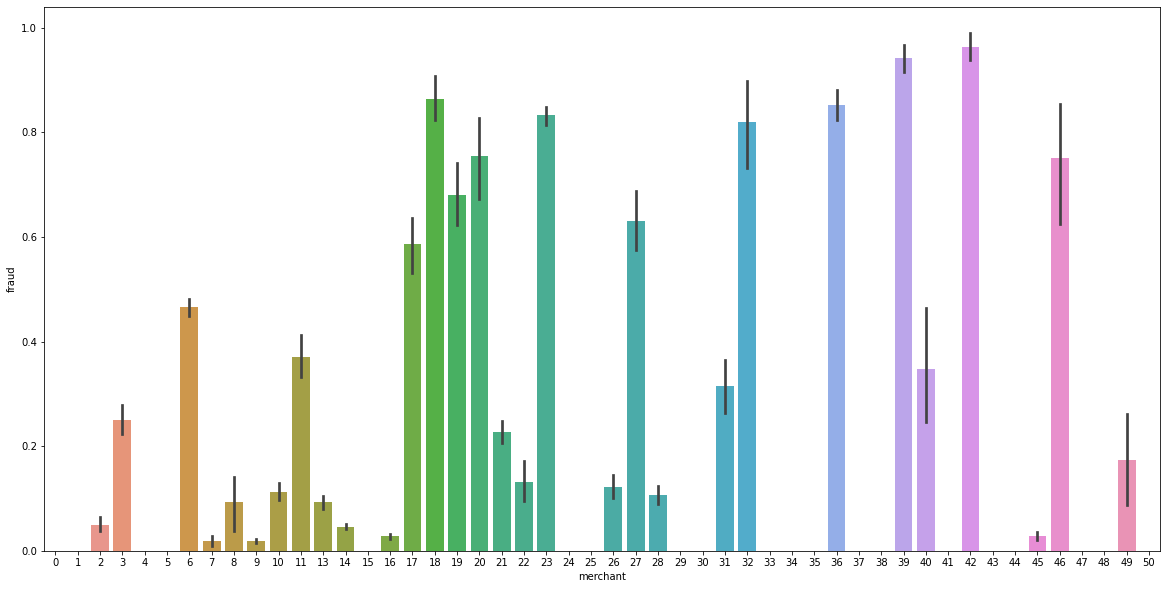

In [33]:
sns.barplot(x='merchant',y='fraud',data=df)

In [34]:
df['zipMerchant'].unique()

array(["'28007'"], dtype=object)

In [35]:
df['category'].unique()

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [36]:
df.loc[df['category']=="'es_transportation'", 'category'] = 0
df.loc[df['category']=="'es_health'", 'category'] = 1
df.loc[df['category']=="'es_otherservices'", 'category'] = 2
df.loc[df['category']=="'es_food'", 'category'] = 3
df.loc[df['category']=="'es_hotelservices'", 'category'] = 4
df.loc[df['category']=="'es_barsandrestaurants'", 'category'] = 5
df.loc[df['category']=="'es_tech'", 'category'] = 6
df.loc[df['category']=="'es_sportsandtoys'", 'category'] = 7
df.loc[df['category']=="'es_wellnessandbeauty'", 'category'] = 8
df.loc[df['category']== "'es_hyper'", 'category'] = 9
df.loc[df['category']=="'es_fashion'", 'category'] = 10
df.loc[df['category']=="'es_home'", 'category'] = 11
df.loc[df['category']=="'es_contents'", 'category'] = 12
df.loc[df['category']=="'es_travel'", 'category'] = 13
df.loc[df['category']=="'es_leisure'",  'category'] = 14

In [37]:
df['amount'].unique()

array([  4.55,  39.68,  26.89, ..., 249.18, 224.81, 190.31])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [39]:
from collections import Counter

In [40]:
print('Classes and number of values in trainset',Counter(df['fraud']))

Classes and number of values in trainset Counter({0: 587443, 1: 7200})


In [41]:
import seaborn as sns

<AxesSubplot:>

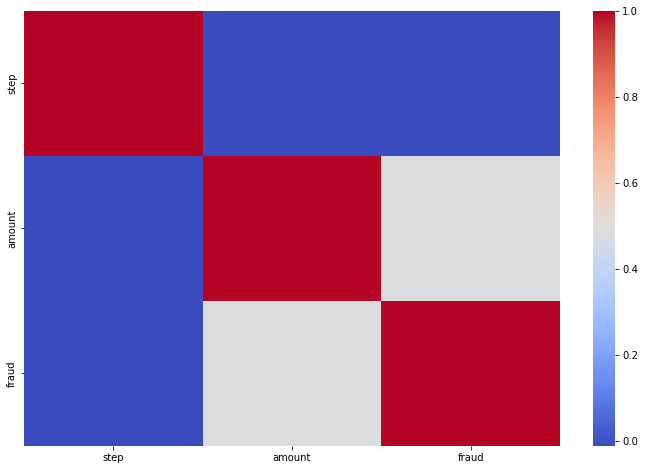

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

In [43]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151',4,2,0,0,'28007',0,4.55,0
1,0,'C352968107',2,2,0,0,'28007',0,39.68,0
2,0,'C2054744914',4,1,0,1,'28007',0,26.89,0
3,0,'C1760612790',3,2,0,0,'28007',0,17.25,0
4,0,'C757503768',5,2,0,0,'28007',0,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738',3,1,0,1,'28007',0,20.53,0
594639,179,'C650108285',4,1,0,1,'28007',0,50.73,0
594640,179,'C123623130',2,1,0,15,'28007',10,22.44,0
594641,179,'C1499363341',5,2,0,1,'28007',0,14.46,0


In [44]:
df['fraud'].unique()

array([0, 1], dtype=int64)

In [45]:
y = df['fraud']


In [46]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151',4,2,0,0,'28007',0,4.55,0
1,0,'C352968107',2,2,0,0,'28007',0,39.68,0
2,0,'C2054744914',4,1,0,1,'28007',0,26.89,0
3,0,'C1760612790',3,2,0,0,'28007',0,17.25,0
4,0,'C757503768',5,2,0,0,'28007',0,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738',3,1,0,1,'28007',0,20.53,0
594639,179,'C650108285',4,1,0,1,'28007',0,50.73,0
594640,179,'C123623130',2,1,0,15,'28007',10,22.44,0
594641,179,'C1499363341',5,2,0,1,'28007',0,14.46,0


In [47]:
print('Classes and number of values in trainset after SMOTE:',Counter(y))

Classes and number of values in trainset after SMOTE: Counter({0: 587443, 1: 7200})


In [48]:
X = df[['age','gender','zipcodeOri','merchant','category','amount']]

In [49]:
#conda install -c conda-forge imbalanced-learn

In [50]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [51]:
X,y = oversample.fit_resample(X,y)


In [52]:
 print('Classes and number of values in trainset after SMOTE:',Counter(y))

Classes and number of values in trainset after SMOTE: Counter({0: 587443, 1: 587443})


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [55]:
 X_train.shape

(822420, 6)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
rf = RandomForestClassifier(n_estimators=60, random_state=23)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60, random_state=23)

In [58]:
rf.score(X_train,y_train)

0.9999671700590939

In [59]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test )
accuracy_score(y_pred,y_test) 

0.9965670447646015

In [61]:
import sklearn.metrics

In [62]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175793
           1       1.00      1.00      1.00    176673

    accuracy                           1.00    352466
   macro avg       1.00      1.00      1.00    352466
weighted avg       1.00      1.00      1.00    352466



In [63]:
y_pred = rf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[175102,    691],
       [   519, 176154]], dtype=int64)

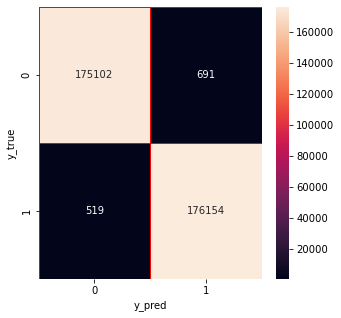

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [65]:
import pickle

pickle.dump(rf,open('fraud.pkl','wb'))
fraud = pickle.load(open('fraud.pkl','rb'))